# Importing Libraries and Datasets


In [16]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as r

In [17]:
#function to generate random colors
def randomColor(n):
    color = []
    colorArr = ['00','11','22','33','44','55','66','77','88','99','AA','BB','CC','EE','FF']
    for _ in range(n):
        color.append('#'+colorArr[r.randint(0,15)]+ colorArr[r.randint(0,15)] + colorArr[r.randint(0,15)])
    return color

In [18]:
#get datasets
traindf = pd.read_csv('train.csv')
display(traindf.head())
print(traindf.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)


In [19]:
testdf = pd.read_csv('test.csv')
display(testdf.head())
print(testdf.shape)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


(418, 11)


# Exploratory Data Analysis

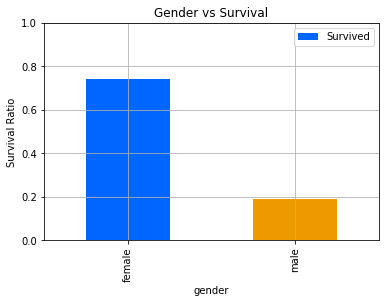

In [20]:
gender_survived = traindf[['Sex', 'Survived']].groupby('Sex').mean()
gender_survived.plot(kind='bar', color = [randomColor(len(gender_survived))])
plt.title('Gender vs Survival')
plt.ylim(0,1)
plt.grid()
plt.xlabel('gender')
plt.ylabel('Survival Ratio')
plt.show()

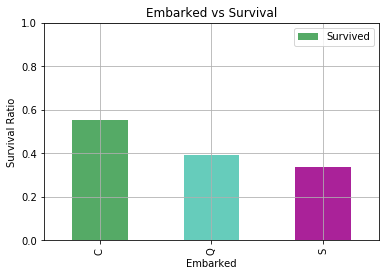

In [21]:
embarked_survived = traindf[['Embarked', 'Survived']].groupby('Embarked').mean()
embarked_survived.plot(kind='bar', color = [randomColor(len(embarked_survived))])
plt.title('Embarked vs Survival')
plt.ylim(0,1)
plt.grid()
plt.xlabel('Embarked')
plt.ylabel('Survival Ratio')
plt.show()

In [1]:
parch_survived = traindf[['Parch', 'Survived']].groupby('Parch').mean()
parch_survived.plot(kind='bar', color = [randomColor(len(parch_survived))])
plt.title('Parch vs Survival')
plt.ylim(0,1)
plt.grid()
plt.xlabel('Parch')
plt.ylabel('Survival Ratio')
plt.show()

NameError: name 'traindf' is not defined

In [ ]:
sibsp_survived = traindf[['SibSp', 'Survived']].groupby('SibSp').mean()
sibsp_survived.plot(kind='bar', color = [randomColor(len(sibsp_survived))])
plt.title('Sibsp vs Survival')
plt.ylim(0,1)
plt.grid()
plt.xlabel('Sibsp')
plt.ylabel('Survival Ratio')
plt.show()

In [ ]:
agegrp = {'child':(0,13), 'teen':(13,20), 'young_adult':(20,35), 'middle_adult':(35,45), 'old_adult':(45,60), 'senior_citizen':(60,100)}
age_survival = traindf[['Age','Survived']].dropna().reset_index(drop=True)
age_survival['age_grp'] = None

for i in range(len(age_survival)):
    for grp in agegrp:
        temp = agegrp[grp]
        if age_survival.loc[i,'Age'] in range(temp[0],temp[1]):
            age_survival.loc[i,'age_grp'] = grp
            break
            
age_survival = age_survival.drop(columns=['Age']).groupby('age_grp').mean()

age_survival.plot(kind= 'barh', color = [randomColor(6)], legend=False)
plt.title('Age Group vs Survival')
plt.xlim(0,1)
plt.grid()
plt.xlabel('Survival Ratio')
plt.ylabel('Age Group')
plt.show()

In [ ]:
traindf2 =traindf[['Survived', 'Pclass','Sex','Age','SibSp','Parch','Embarked']]

In [ ]:
missingdf = traindf2.transpose()
missingdf['missing values'] = missingdf.apply(lambda x: len(traindf)-x.count(), axis=1)
missingdf = missingdf[['missing values']]
missingdf

In [ ]:
traindf2.drop(columns=['Age'], inplace=True)
traindf2['Embarked'].fillna(traindf2['Embarked'].mode()[0], inplace=True)
display(traindf2.head())

In [ ]:
y = traindf2["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
X = pd.concat([pd.get_dummies(traindf2[features[0]]),pd.get_dummies(traindf2[features[1:]])], axis = 1, sort = False)
display(X.head())
print(X.shape)